In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [ ]:
# Load datasets
ratings_df = pd.read_csv("/home/es/Desktop/code/Movies_recommandation/archive/ratings.csv")
movies_df = pd.read_csv("/home/es/Desktop/code/Movies_recommandation/archive/movies.csv")

In [3]:
# Merge ratings with movie titles
movies_ratings_df = pd.merge(ratings_df, movies_df, on="movieId")
movies_ratings_df = movies_ratings_df.drop(["timestamp", "genres"], axis=1)

In [4]:
display(movies_ratings_df.head())
movies_ratings_df.info()
display(movies_ratings_df.describe())

,userId,movieId,rating,title
0,1,296,5.0,Pulp Fiction (1994)
1,1,306,3.5,Three Colors: Red (Trois couleurs: Rouge) (1994)
2,1,307,5.0,Three Colors: Blue (Trois couleurs: Bleu) (1993)
3,1,665,5.0,Underground (1995)
4,1,899,3.5,Singin' in the Rain (1952)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int64  
 1   movieId  int64  
 2   rating   float64
 3   title    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 762.9+ MB


,userId,movieId,rating
count,2.500010e+07,2.500010e+07,2.500010e+07
mean,8.118928e+04,2.138798e+04,3.533854e+00
std,4.679172e+04,3.919886e+04,1.060744e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,4.051000e+04,1.196000e+03,3.000000e+00
50%,8.091400e+04,2.947000e+03,3.500000e+00
75%,1.215570e+05,8.623000e+03,4.000000e+00
max,1.625410e+05,2.091710e+05,5.000000e+00


In [5]:
print("Missing values per column:")
print(movies_ratings_df.isnull().sum())

Missing values per column:
userId     0
movieId    0
rating     0
title      0
dtype: int64


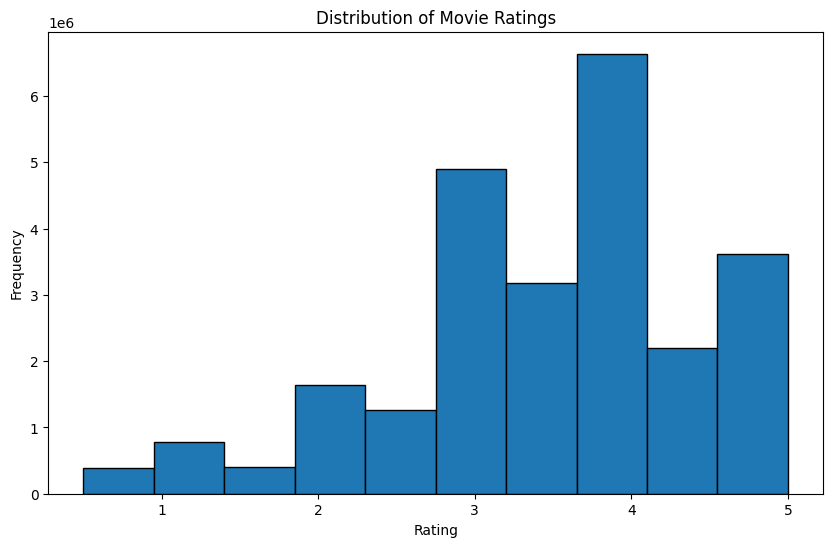

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(movies_ratings_df['rating'], bins=10, edgecolor='black')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

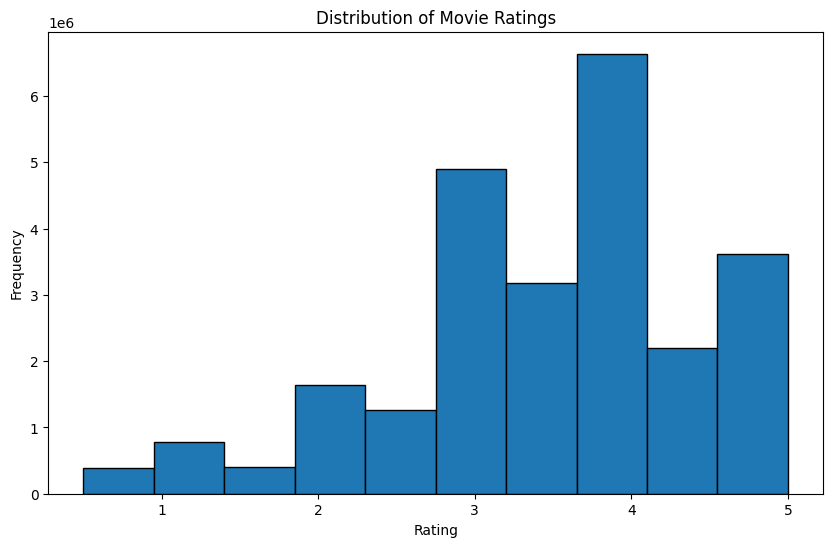

In [7]:
# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
plt.hist(movies_ratings_df['rating'], bins=10, edgecolor='black')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

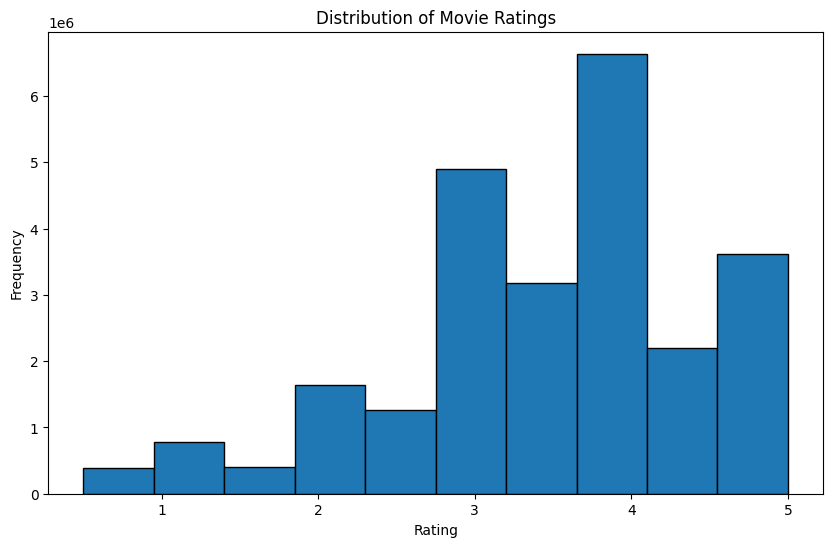

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(movies_ratings_df['rating'], bins=10, edgecolor='black')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

Number of unique movies: 59047
Number of unique users: 162541


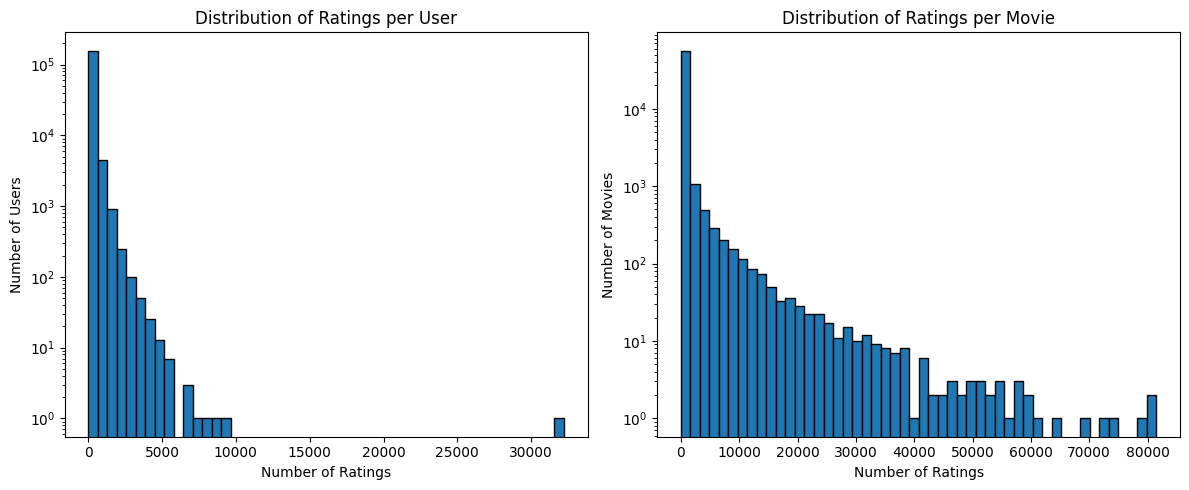

In [9]:
print(f"Number of unique movies: {movies_ratings_df['movieId'].nunique()}")
print(f"Number of unique users: {movies_ratings_df['userId'].nunique()}")

ratings_per_user = movies_ratings_df.groupby('userId').size()
ratings_per_movie = movies_ratings_df.groupby('movieId').size()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(ratings_per_user, bins=50, edgecolor='black')
plt.title('Distribution of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.yscale('log') # Use log scale due to skewed distribution

plt.subplot(1, 2, 2)
plt.hist(ratings_per_movie, bins=50, edgecolor='black')
plt.title('Distribution of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.yscale('log') # Use log scale due to skewed distribution

plt.tight_layout()
plt.show()

In [10]:
# Calculate average rating for each movie
average_ratings = movies_ratings_df.groupby('movieId')['rating'].mean()

# Calculate number of ratings for each movie
rating_counts = movies_ratings_df.groupby('movieId').size().rename('rating_count')

# Merge with movies_df to get titles
movie_stats = pd.merge(average_ratings, rating_counts, on='movieId')
movie_stats = pd.merge(movie_stats, movies_df, on='movieId')

# Sort by rating count and display top 10
print("Top 10 movies with the most ratings:")
display(movie_stats.sort_values(by='rating_count', ascending=False).head(10))

# Filter for movies with at least 50 ratings and sort by average rating
min_ratings_threshold = 50
top_average_ratings = movie_stats[movie_stats['rating_count'] >= min_ratings_threshold]
print(f"\nTop 10 movies with the highest average ratings (minimum {min_ratings_threshold} ratings):")
display(top_average_ratings.sort_values(by='rating', ascending=False).head(10))

Top 10 movies with the most ratings:


,movieId,rating,rating_count,title,genres
351,356,4.048011,81491,Forrest Gump (1994),Comedy|Drama|Romance|War
314,318,4.413576,81482,"Shawshank Redemption, The (1994)",Crime|Drama
292,296,4.188912,79672,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
585,593,4.151342,74127,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
2480,2571,4.154099,72674,"Matrix, The (1999)",Action|Sci-Fi|Thriller
257,260,4.120189,68717,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
475,480,3.679175,64144,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller
522,527,4.247579,60411,Schindler's List (1993),Drama|War
108,110,4.002273,59184,Braveheart (1995),Action|Drama|War
2867,2959,4.228311,58773,Fight Club (1999),Action|Crime|Drama|Thriller



Top 10 movies with the highest average ratings (minimum 50 ratings):


,movieId,rating,rating_count,title,genres
42953,171011,4.483096,1124,Planet Earth II (2016),Documentary
38361,159817,4.464797,1747,Planet Earth (2006),Documentary
314,318,4.413576,81482,"Shawshank Redemption, The (1994)",Crime|Drama
42806,170705,4.398599,1356,Band of Brothers (2001),Action|Drama|War
43172,171495,4.326715,277,Cosmos,(no genres listed)
840,858,4.324336,52498,"Godfather, The (1972)",Crime|Drama
46627,179135,4.289833,659,Blue Planet II (2017),Documentary
49,50,4.284353,55366,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
54972,198185,4.267361,288,Twin Peaks (1989),Drama|Mystery
1190,1221,4.261759,34188,"Godfather: Part II, The (1974)",Crime|Drama


# Data Analysis Key Findings

- The `movies_ratings_df` DataFrame contains over 25 million entries with columns for `userId`, `movieId`, `rating`, and `title`.
- There are no missing values in the `movies_ratings_df` DataFrame.
- The distribution of movie ratings is concentrated around higher values, suggesting a tendency towards positive ratings.
- The dataset includes 59,047 unique movies and 162,541 unique users.
- The distributions of ratings per user and per movie are highly skewed. Most users have rated a small number of movies, and most movies have been rated by a small number of users. Logarithmic scales were used in visualizations to account for this skewness.
- Popular movies like *Forrest Gump*, *The Shawshank Redemption*, and *Pulp Fiction* have the highest number of ratings.
- Movies with the highest average ratings (among those with at least 50 ratings) include titles such as *Planet Earth II* and *The Shawshank Redemption*.


In [11]:
'''
# Use a small sample to reduce computation
sample_df = movies_ratings_df.sample(frac=0.01, random_state=0)
'''

In [6]:
# Pick top N active users
top_users = movies_ratings_df['userId'].value_counts().head(500).index
# Pick top M popular movies
top_movies = movies_ratings_df['movieId'].value_counts().head(500).index

# Filter dataset to only include these users and movies
sample_df = movies_ratings_df[
    (movies_ratings_df['userId'].isin(top_users)) &
    (movies_ratings_df['movieId'].isin(top_movies))
]

In [7]:
# Split into train and test sets
train_df, test_df = train_test_split(sample_df, test_size=0.2, random_state=0)

In [8]:
# Create user-item matrices
train_matrix = train_df.pivot(index='userId', columns='movieId', values='rating')
test_matrix = test_df.pivot(index='userId', columns='movieId', values='rating')

In [9]:
# Fill missing values with 0 for similarity computation
train_matrix_filled = train_matrix.fillna(0)

In [10]:
# Compute item-based cosine similarity
item_sim = cosine_similarity(train_matrix_filled.T)
item_sim_df = pd.DataFrame(item_sim, index=train_matrix_filled.columns, columns=train_matrix_filled.columns)

In [11]:
# Compute user-based cosine similarity
user_sim = cosine_similarity(train_matrix_filled)
user_sim_df = pd.DataFrame(user_sim, index=train_matrix_filled.index, columns=train_matrix_filled.index)

In [12]:
# Function to predict ratings
def predict_rating(user_id, movie_id, matrix, sim_matrix, type='item'):
    if type == 'item':
        # Item-based: weighted sum of ratings by user for similar items
        similar_items = sim_matrix[movie_id]
        user_ratings = matrix.loc[user_id]
        mask = user_ratings.notna()
        if mask.sum() == 0:
            return np.nan
        numerator = (similar_items[mask] * user_ratings[mask]).sum()
        denominator = similar_items[mask].sum()
        return numerator / denominator if denominator != 0 else np.nan
    elif type == 'user':
        # User-based: weighted sum of ratings by similar users for the movie
        if movie_id not in matrix.columns:
            return np.nan
        user_ratings = matrix[movie_id]
        similar_users = sim_matrix[user_id]
        mask = user_ratings.notna()
        if mask.sum() == 0:
            return np.nan
        numerator = (similar_users[mask] * user_ratings[mask]).sum()
        denominator = similar_users[mask].sum()
        return numerator / denominator if denominator != 0 else np.nan

In [17]:
# Function to evaluate predictions
def evaluate(test_matrix, matrix, sim_matrix, type='item'):
    preds, actuals = [], []
    for user in test_matrix.index:
        for movie in test_matrix.columns:
            actual = test_matrix.loc[user, movie]
            if pd.notna(actual):
                pred = predict_rating(user, movie, matrix, sim_matrix, type)
                if pd.notna(pred):
                    preds.append(pred)
                    actuals.append(actual)
    mse = mean_squared_error(actuals, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actuals, preds)
    return rmse, mae

In [18]:
# Evaluate item-based model
item_rmse, item_mae = evaluate(test_matrix, train_matrix, item_sim_df, type='item')
print(f"Item-based RMSE: {item_rmse:.4f}, MAE: {item_mae:.4f}")

# Evaluate user-based model
user_rmse, user_mae = evaluate(test_matrix, train_matrix, user_sim_df, type='user')
print(f"User-based RMSE: {user_rmse:.4f}, MAE: {user_mae:.4f}")

Item-based RMSE: 0.9226, MAE: 0.7150
User-based RMSE: 0.9409, MAE: 0.7241


In [19]:
# Recommendation function
def recommend_movies(user_id, n=5, type='item'):
    watched = train_matrix.loc[user_id].dropna().index.tolist()
    candidates = [m for m in train_matrix.columns if m not in watched]
    predictions = []
    for movie in candidates:
        pred = predict_rating(user_id, movie, train_matrix, item_sim_df if type=='item' else user_sim_df, type)
        if pd.notna(pred):
            predictions.append((movie, pred))
    predictions.sort(key=lambda x: x[1], reverse=True)
    top_movies = [m for m, _ in predictions[:n]]
    return movies_df[movies_df['movieId'].isin(top_movies)]

In [20]:
# Example usage
user_id = train_matrix.index[0]
print(f"Top 5 item-based recommendations for user {user_id}:")
display(recommend_movies(user_id, n=5, type='item'))

print(f"Top 5 user-based recommendations for user {user_id}:")
display(recommend_movies(user_id, n=5, type='user'))

Top 5 item-based recommendations for user 548:


,movieId,title,genres
1198,1230,Annie Hall (1977),Comedy|Romance
5883,5995,"Pianist, The (2002)",Drama|War
5904,6016,City of God (Cidade de Deus) (2002),Action|Adventure|Crime|Drama|Thriller
21167,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama
25053,122882,Mad Max: Fury Road (2015),Action|Adventure|Sci-Fi|Thriller


Top 5 user-based recommendations for user 548:


,movieId,title,genres
840,858,"Godfather, The (1972)",Crime|Drama
891,912,Casablanca (1942),Drama|Romance
1168,1198,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure
1173,1203,12 Angry Men (1957),Drama
1190,1221,"Godfather: Part II, The (1974)",Crime|Drama
